# Analysis of Airbnb-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Airbnb Lab 2.csv')
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

> there are some nulls let's investigate them

In [4]:
# so there are some ? about this data
# the id format is unkown so I need to know more about it it consist of 10 places of digits and chars
# the data for the account seems right but Need to change the data type making it datetime 
# timestamp_first_active needs to be converted to data to help in analysis
# date_first_booking the nulls is making sence because all it means this person didn't make a booking so the data is null
# gender dosn't has nulls b ut it has values like unknown and other
# so I will assume the user doesn't want to reavel his gender for whatever reason
# I could say gender coulmn is missing not at random bacause the user didn't want to say his gender
# the age has null values most of them has unkowng gender so we might say the same assumption like gender
# first_affiliate_tracked has some nulls and I think they are missing at random because they depened on device ytpe and the browser so they have no info
# sign up method is correct column for me has values basic, facebook, google
# sign up flow also is correct and has values from 0 to 25
# language, affiliate_channel, affiliate_provider,signup_app, first_device_type,first_browser, is good column
# the most important column is country_destination so we will foucs on it

In [52]:
df[df['first_affiliate_tracked'].isna()]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,first_active
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,FR,2010-01-05 06:08:59
16,2dwbwkx056,2010-01-07,20100107215125,NaN,-unknown-,NaN,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF,2010-01-07 21:51:25
17,frhre329au,2010-01-07,20100107224625,2010-01-09,-unknown-,31.0,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,US,2010-01-07 22:46:25
18,cxlg85pg1r,2010-01-08,20100108015641,NaN,-unknown-,NaN,basic,0,en,seo,facebook,NaN,Web,Other/Unknown,-unknown-,NDF,2010-01-08 01:56:41
20,qdubonn3uk,2010-01-10,20100110152120,2010-01-18,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,US,2010-01-10 15:21:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197868,c1qplgehvg,2014-06-01,20140601141744,NaN,-unknown-,NaN,basic,25,en,direct,direct,NaN,iOS,Other/Unknown,-unknown-,NDF,2014-06-01 14:17:44
200289,us5b8o8joz,2014-06-05,20140605220222,NaN,-unknown-,NaN,basic,25,en,direct,direct,NaN,iOS,Other/Unknown,-unknown-,NDF,2014-06-05 22:02:22
203847,202t9mxmon,2014-06-12,20140612235741,NaN,-unknown-,NaN,basic,25,en,direct,direct,NaN,iOS,Other/Unknown,-unknown-,NDF,2014-06-12 23:57:41
206913,9osh0ra0i9,2014-06-19,20140619022617,NaN,-unknown-,NaN,basic,25,en,direct,direct,NaN,iOS,Other/Unknown,-unknown-,NDF,2014-06-19 02:26:17


> convert timestamp_first_active to write format

In [6]:
df['first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')
df['date_account_created'] = pd.to_datetime(df['date_account_created'])

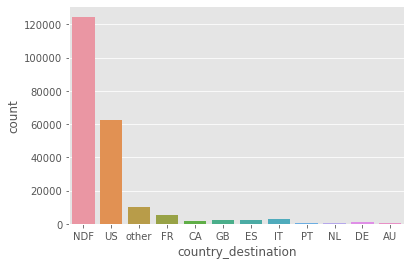

In [7]:
sns.countplot(data=df, x='country_destination');

a lot of destination are not found so we will build our analysis to see why and what is the common actions for people to not book

# ANALYSIS of NDF AND KNOWING THE REASONS FO IT

In [8]:
# create new data frame has the info we need
new_df = df[df['country_destination']=='NDF'].copy()
new_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19 04:32:55
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23 17:48:09
11,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF,2010-01-05 05:18:12
13,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF,2010-01-05 08:32:59
14,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF,2010-01-07 05:58:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,2014-06-30 23:56:36
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,2014-06-30 23:57:19
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,2014-06-30 23:57:54
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,2014-06-30 23:58:22


> I will extract the month and year from both datas

In [9]:
new_df['first_active_year'] = new_df['first_active'].dt.year
new_df['first_active_month'] = new_df['first_active'].dt.month

In [10]:
new_df['account_created_year'] = new_df['date_account_created'].dt.year
new_df['account_created_month'] = new_df['date_account_created'].dt.month

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124543 entries, 0 to 213450
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       124543 non-null  object        
 1   date_account_created     124543 non-null  datetime64[ns]
 2   timestamp_first_active   124543 non-null  int64         
 3   date_first_booking       0 non-null       object        
 4   gender                   124543 non-null  object        
 5   age                      56929 non-null   float64       
 6   signup_method            124543 non-null  object        
 7   signup_flow              124543 non-null  int64         
 8   language                 124543 non-null  object        
 9   affiliate_channel        124543 non-null  object        
 10  affiliate_provider       124543 non-null  object        
 11  first_affiliate_tracked  120216 non-null  object        
 12  signup_app      

In [54]:
df.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


Text(0.5, 1.0, 'Users count per year')

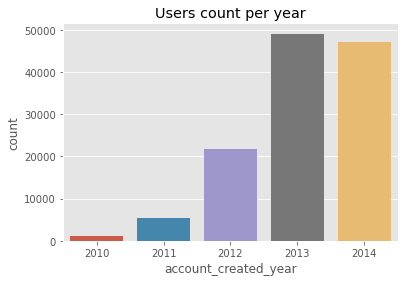

In [19]:
year_grouped = new_df.groupby('account_created_year')['id'].agg('count').reset_index()
sns.barplot(data=year_grouped, y='id', x='account_created_year')
plt.ylabel('count')
plt.title("Users account created count per year");

Text(0.5, 1.0, 'Users first active count per year')

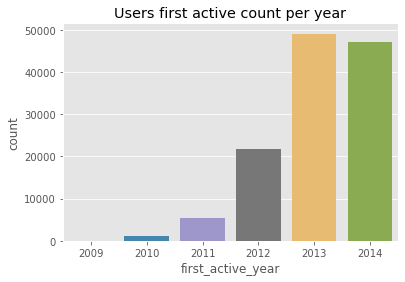

In [20]:
year_grouped2 = new_df.groupby('first_active_year')['id'].agg('count').reset_index()
sns.barplot(data=year_grouped2, y='id', x='first_active_year')
plt.ylabel('count')
plt.title("Users first active count per year");

>from both plots we can see that almost all the people who were first active did create account

C:\Users\khale\AppData\Local\Temp\ipykernel_12028\3385186223.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=new_df[df.age<200], x='age', ax=axes[1])


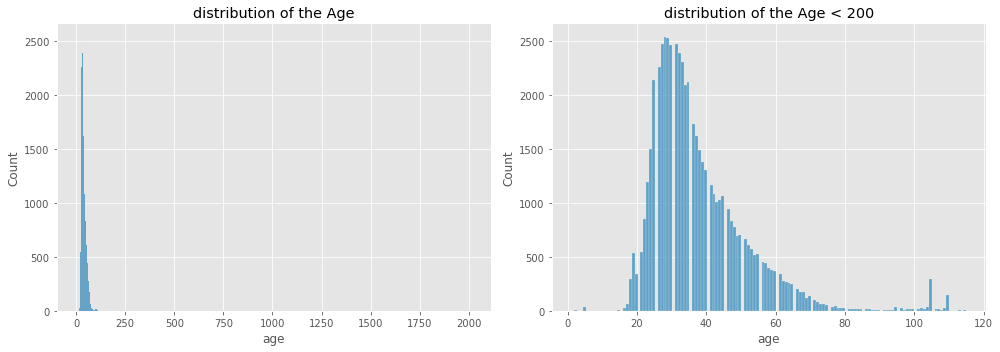

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
axes = ax.flatten()
sns.histplot(data=new_df, x='age', ax=axes[0])
sns.histplot(data=new_df[df.age<200], x='age', ax=axes[1])
axes[0].set_title("distribution of the Age")
axes[1].set_title("distribution of the Age < 200")
plt.tight_layout()

> there are so much values in age is wrong we need to know why all these errors

> even after getting only ages to 200 we still a lot of unexpected values

<AxesSubplot:>

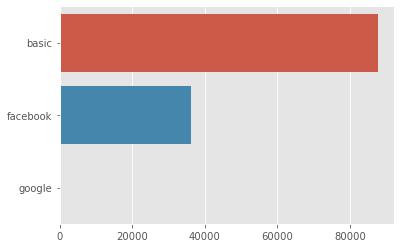

In [16]:
value_count = new_df.signup_method.value_counts()
sns.barplot(y=value_count.index, x=value_count.values);

> most people coming from direct channel but the are less numbers coming from seo content and remarkting so we need to target these channes more

<AxesSubplot:>

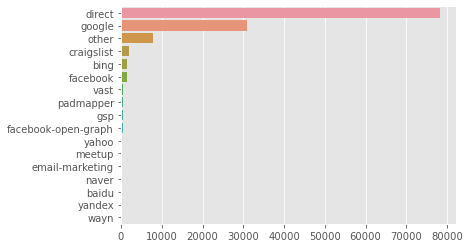

In [17]:
value_count = new_df.affiliate_provider.value_counts()
sns.barplot(y=value_count.index, x=value_count.values);

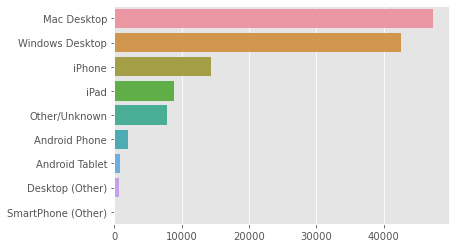

In [51]:
value_count = new_df.first_device_type.value_counts()
sns.barplot(y=value_count.index, x=value_count.values);

In [53]:
# I HAVE NO CLUE how to conduct analysis with messy data like this :)

In [65]:
cols = ['gender', 'age', 'signup_flow', 'affiliate_channel', 'affiliate_provider','signup_app', 'first_device_type']
df.groupby('signup_method')[cols].agg(['mean', 'count', 'min', 'max', 'median'])

C:\Users\khale\AppData\Local\Temp\ipykernel_12028\806168808.py:2: FutureWarning: ['gender', 'affiliate_channel', 'affiliate_provider', 'signup_app', 'first_device_type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('signup_method')[cols].agg(['mean', 'count', 'min', 'max', 'median'])


age                             signup_flow              \
                    mean  count   min     max median        mean   count min   
signup_method                                                                  
basic          58.177376  67467   1.0  2014.0   34.0    3.513136  152897   0   
facebook       39.781394  57853   2.0  2014.0   33.0    2.561775   60008   0   
google         34.843972    141  18.0    99.0   32.0   12.000000     546  12   

                          
              max median  
signup_method             
basic          25    0.0  
facebook       25    0.0  
google         12   12.0

of course the outliers shift the mean of the age per signup method so we could take the median to be more indecative

we can see that the age are close to each other in each method

<AxesSubplot:xlabel='signup_method', ylabel='age'>

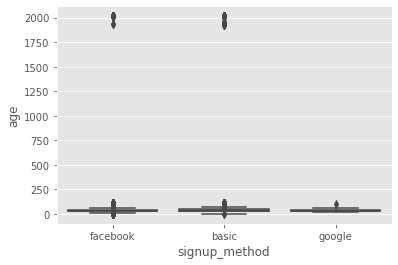

In [64]:
sns.boxplot(data=new_df, y='age', x='signup_method')

<AxesSubplot:xlabel='signup_method', ylabel='age'>

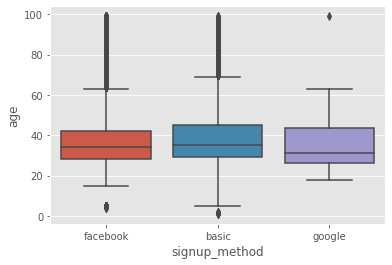

In [63]:
df_100years = new_df[new_df.age<100] 
sns.boxplot(data=df_100years, y='age', x='signup_method')

now we can see a people under 100 years

# now we want to see why people are not coming from google

In [67]:
google_df = new_df[new_df['signup_method']=='google']
google_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,first_active,first_active_year,first_active_month,account_created_year,account_created_month
171491,makz7uqzuk,2014-04-04,20140404010954,NaN,-unknown-,NaN,google,12,en,direct,...,untracked,Android,Other/Unknown,-unknown-,NDF,2014-04-04 01:09:54,2014,4,2014,4
171655,ipxbse0lhg,2014-04-04,20140404154343,NaN,-unknown-,NaN,google,12,en,direct,...,untracked,Android,Other/Unknown,-unknown-,NDF,2014-04-04 15:43:43,2014,4,2014,4
171667,uuq0ljx47b,2014-04-04,20140404163433,NaN,-unknown-,NaN,google,12,en,direct,...,untracked,Android,Other/Unknown,-unknown-,NDF,2014-04-04 16:34:33,2014,4,2014,4
171765,7m912mhcn4,2014-04-04,20140404202930,NaN,-unknown-,NaN,google,12,en,direct,...,untracked,Android,Other/Unknown,-unknown-,NDF,2014-04-04 20:29:30,2014,4,2014,4
171770,2ikibz6tod,2014-04-04,20140404204213,NaN,FEMALE,23.0,google,12,en,direct,...,untracked,Android,Other/Unknown,-unknown-,NDF,2014-04-04 20:42:13,2014,4,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212558,vktv8aeq26,2014-06-29,20140629092343,NaN,-unknown-,NaN,google,12,en,direct,...,untracked,Android,Android Phone,-unknown-,NDF,2014-06-29 09:23:43,2014,6,2014,6
212810,au5bbe69vf,2014-06-29,20140629223423,NaN,-unknown-,NaN,google,12,en,direct,...,untracked,Android,Android Phone,-unknown-,NDF,2014-06-29 22:34:23,2014,6,2014,6
212841,jvupmcicjt,2014-06-29,20140629232120,NaN,-unknown-,NaN,google,12,en,direct,...,untracked,Android,Android Phone,-unknown-,NDF,2014-06-29 23:21:20,2014,6,2014,6
213306,2bnl5yrkku,2014-06-30,20140630200122,NaN,-unknown-,NaN,google,12,en,direct,...,untracked,Android,Android Tablet,-unknown-,NDF,2014-06-30 20:01:22,2014,6,2014,6


<AxesSubplot:>

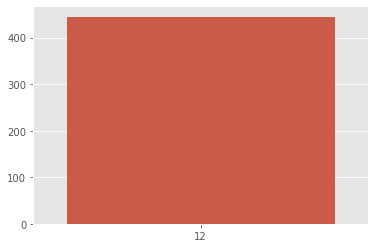

In [74]:
google_counts = google_df.signup_flow.value_counts()
sns.barplot(x=google_counts.index, y=google_counts.values)

all of the people came from google have to do 12 signup flow to get to the website 

<AxesSubplot:xlabel='age', ylabel='Count'>

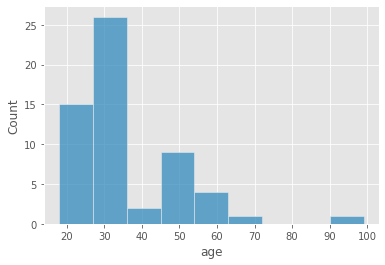

In [76]:
sns.histplot(google_df.age)

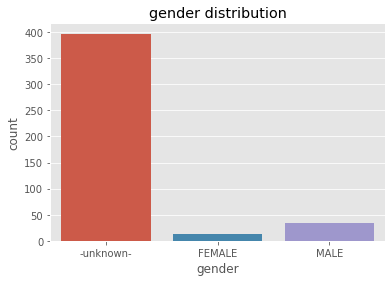

In [80]:
sns.countplot(data=google_df, x='gender')
plt.title("gender distribution");

most ppl doesn't enter their gender

<AxesSubplot:xlabel='signup_app', ylabel='count'>

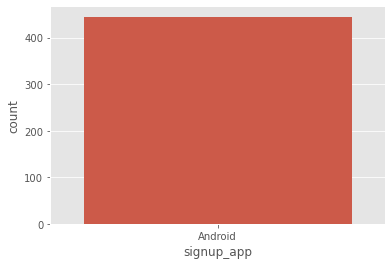

In [82]:
sns.countplot(data=google_df, x='signup_app')

so we can conclude that ppl coming from google and signing up throw andriod systems have an issue

<AxesSubplot:xlabel='first_active_year', ylabel='count'>

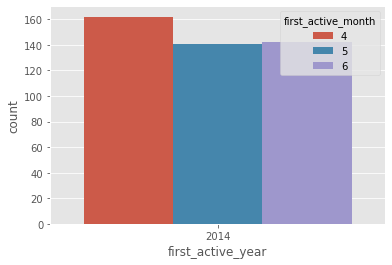

In [84]:
sns.countplot(data=google_df, x='first_active_year', hue='first_active_month')

<AxesSubplot:xlabel='account_created_year', ylabel='count'>

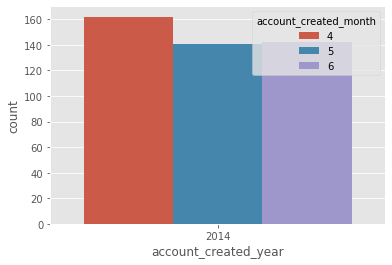

In [85]:
sns.countplot(data=google_df, x='account_created_year', hue='account_created_month')


there were some serious problem in 2014 in 4,5,6 months because all people come from these months did signup but didn't book